In [1]:
from Functions.gridFunctions import *

## Choose Art
select your GitHub theme ("dark or light") and the desired art (art_num1)

### Choose your vision style

In [5]:
theme = "light"      # also "light" as option

### Initialize a blank grid (53x7)

In [6]:
box_edge_color, box_blank_color = set_background(theme)
rows, cols = 7, 53

colors = [[box_blank_color for _ in range(cols)] for _ in range(rows)]

### Choose Art & Colors

Grid saved as grid_output.png


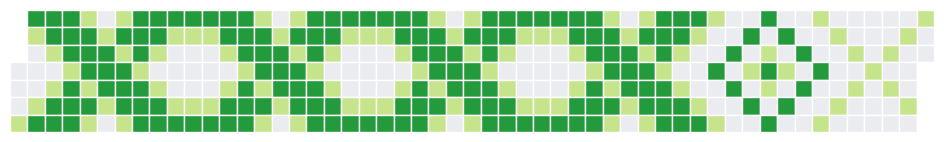

In [8]:
green_max  = "#196127"
green_more = "#239a3b"
green_less = "#7bc96f"
green_min  = "#c6e48b"

create_grid(art_num1(colors, green_min, green_more),box_edge_color)
# create_grid(art_num1(colors, green_min, green_max),box_edge_color)

## Create Calendar Commit Plan
Create a planning dictionnary containing the start and end of each event with the number of commitments per day

### Contributions dataframe

In [9]:
contributions_df = generate_dataframe(colors,box_blank_color)
contributions_df

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53
Sun,2,6,6,6,2,0,2,6,6,6,...,6,0,0,2,0,0,0,0,0,2
Mon,0,2,6,6,6,2,6,6,6,2,...,0,6,0,0,2,0,0,0,2,0
Tue,0,0,2,6,6,6,2,6,2,0,...,2,0,6,0,0,2,0,2,0,0
Wed,0,0,0,2,6,6,6,2,0,0,...,6,2,0,6,0,0,2,0,0,0
Thu,0,0,2,6,2,6,6,6,2,0,...,2,0,6,0,0,2,0,2,0,0
Fri,0,2,6,6,6,2,6,6,6,2,...,0,6,0,0,2,0,0,0,2,0
Sat,2,6,6,6,2,0,2,6,6,6,...,6,0,0,2,0,0,0,0,0,2


### Contributions per date
Create contributions_list 

In [13]:
start_date = datetime(2024, 12, 29, 10, 0)  # 10:00 AM  # first box in the 2025 grid represents the 2024-12-29

contributions_list = []

# Iterate over the rows and columns of the DataFrame
for col in range(contributions_df.shape[1]):  # iterate over the columns (weeks)
    for row in range(contributions_df.shape[0]):  # iterate over the rows (days)    
        # Calculate the corresponding date
        current_date = start_date + timedelta(days=row, weeks=col)
        # Format the date as ISO format with timezone
        start_str = current_date.strftime("%Y-%m-%dT%H:%M:%S+02:00")
        end_str = (current_date + timedelta(hours=1, minutes=30)).strftime("%Y-%m-%dT%H:%M:%S+02:00")
        # Get the number of contributions
        num_contributions = contributions_df.iloc[row, col]
        # Store in the dictionary
        # Add to the list as a dictionary
        contributions_list.append({
            "start": start_str,
            "end": end_str,
            "contributions": int(num_contributions)
        })
        
contributions_list[:5]

[{'start': '2024-12-29T10:00:00+02:00',
  'end': '2024-12-29T11:30:00+02:00',
  'contributions': 2},
 {'start': '2024-12-30T10:00:00+02:00',
  'end': '2024-12-30T11:30:00+02:00',
  'contributions': 0},
 {'start': '2024-12-31T10:00:00+02:00',
  'end': '2024-12-31T11:30:00+02:00',
  'contributions': 0},
 {'start': '2025-01-01T10:00:00+02:00',
  'end': '2025-01-01T11:30:00+02:00',
  'contributions': 0},
 {'start': '2025-01-02T10:00:00+02:00',
  'end': '2025-01-02T11:30:00+02:00',
  'contributions': 0}]

## Google Calendar API
Set Google Calendar reminders

#### Set up Google Calendar API

In [14]:
SCOPES = ["https://www.googleapis.com/auth/calendar"]
creds = None

if os.path.exists("token.json"):
    creds = Credentials.from_authorized_user_file("token.json")

if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())

    else:
        flow = InstalledAppFlow.from_client_secrets_file("credentials.json", SCOPES)
        creds = flow.run_local_server(port=0)

    with open("token.json", "w") as token:
        token.write(creds.to_json())

#### Set Calendar Reminders

In [15]:
for day in contributions_list:      
    try:
            service = build("calendar", "v3", credentials=creds)

            event = {
                "summary": "GitHub Contributions Reminder !!",
                "Location": "Github.com/j1cky",
                "description": ["Today you should commit : " +str(day["contributions"])+ " contributions.\nGrab a pc and commit to make the art happen !!"],
                "colorId": 3,
                "start": {
                    "dateTime": day["start"],
                    "timeZone": "Europe/Vienna"
                },
                "end": {
                    "dateTime": day["end"],
                    "timeZone": "Europe/Vienna"
                },
                "recurrence": [
                    "RRULE:FREQ=DAILY;COUNT=1"
                ],
                "attendees": [
                    {"email": "bounouh.aziz.72@gmail.com"}
                ]
            }

            event = service.events().insert(calendarId="primary", body=event).execute()

            print(f"Event created {event.get('htmlLink')}")
    except HttpError as error:
        print("An error occured:", error)

Event created https://www.google.com/calendar/event?eid=cTlkZzI0cXY5YW9rcGdiYWZrZ3VzNTdkMTRfMjAyNDEyMjlUMDgwMDAwWiBib3Vub3VoLmF6aXouNzJAbQ
Event created https://www.google.com/calendar/event?eid=amQ5cG5iamgxMzQwMmM2MXFqZTJwMWEyazhfMjAyNDEyMzBUMDgwMDAwWiBib3Vub3VoLmF6aXouNzJAbQ
Event created https://www.google.com/calendar/event?eid=Nmw0bHZpbnA5YnFuYzJwc2pxc3AybHVvY2NfMjAyNDEyMzFUMDgwMDAwWiBib3Vub3VoLmF6aXouNzJAbQ
Event created https://www.google.com/calendar/event?eid=N2U3OWplYmc2ZXV0ODI4dWVhc2pudmE2Y29fMjAyNTAxMDFUMDgwMDAwWiBib3Vub3VoLmF6aXouNzJAbQ
Event created https://www.google.com/calendar/event?eid=cmNjMDIxdW5vdnUxb2RmYTZwZjFyZDRjZnNfMjAyNTAxMDJUMDgwMDAwWiBib3Vub3VoLmF6aXouNzJAbQ
Event created https://www.google.com/calendar/event?eid=M2tkcDFjM2c2a3ViZjZqdWwwZjVsZTU1NmtfMjAyNTAxMDNUMDgwMDAwWiBib3Vub3VoLmF6aXouNzJAbQ
Event created https://www.google.com/calendar/event?eid=bzVvdG04MmUyZG9vaHJsbW5xMzNsM3NtY2NfMjAyNTAxMDRUMDgwMDAwWiBib3Vub3VoLmF6aXouNzJAbQ
Event created https://www.g